# Numerical experiments - Support Selection Analysis (for partial random Toeplitz matrices)

In this notebook, we perform numerical experiments with synthethically created random data to test a simple support selection method for problems of type $$ A(u+v) = y.$$ Specifically, this method ranks the supports by the signal-to-noise ratio $$\frac{\min\limits_{i \in I}|u_{I}|}{||V_I||_{\infty}}$$ where $u_{I}$ and $v_{I}$ are solutions that belong to a specific support. They are created by performing the least-squares regressions
$$ u_I = \textrm{argmin}_{u \in \mathbb{R}^{|I|}} ||A_I u - y||_2^2$$ and 
$$ v_I = \textrm{argmin}_{v \in \mathbb{R}^n} ||Av - (y - A_I u_I)||_2^2$$
and thus they only depend on the support but not on parameters $(\beta,\alpha)$. Throughout this notebook, $A$ is a re-scaled partial random Toeplitz matrix.

The code that is used to perform these experiments can be found in the repository https://github.com/soply/mpgraph. In the following plots we show the rates with which a specific method is successful in that a generating support $\rm{supp}(u)$ is contained in the tiling, and with which this support is also selected by our support selection method.

#### Creating the data for the experiments
The data is created by using the methods provided in the ```problem_factory``` subfolder of the ```mpgraph``` repository or the ```sparse_encoder_testsuite``` repository. Essentially, we use partial random Toeplitz matrices (from a Rademacher sequence) $A \in \mathbb{R}^{m \times n}$, a random signal $u \in \mathbb{R}^n$ and random signal noise $v \in \mathbb{R}^n$. This yields $y = A(u+v)$. The characteristics of $u, v$ are specified in the problem dictionaries. Details on what the entries in this dictionaries mean can be found in the source code. Moreover, in some cases we add additional measurement noise on y.

## 0. Import the code to multi-penalty framework and sparse encoders

In [1]:
import sys
import numpy as np
relative_path_to_mp_source = '../tiling_graph/' # My relative path to the multi-penalty source code
sys.path.append(relative_path_to_mp_source)
from mpgraph.run_multiple_batches import main as main_mp # Run method multi-penalty
from mpgraph.mpgraph.plot_tools.multiple_methods_multiple_batches import success_plus_highest_ranked_vs_signal_gap
from mpgraph.mpgraph.plot_tools.multiple_methods_multiple_batches import success_plus_highest_ranked_vs_sparsity_level
from mpgraph.mpgraph.plot_tools.multiple_methods_multiple_batches import success_plus_highest_ranked_vs_signal_noise

# Defining the tiling creation options for multi-penalty LARS and multi-penalty LASSO methods
tiling_options_LARS = {
    'verbose': 0,
    'mode': 'LARS',
    'print_summary': False
}
tiling_options_LASSO = {
    'verbose': 0,
    'mode': 'LASSO',
    'print_summary': False
}

## 1. Case #measurements > #features
Here, we consider experiments where the number of measurements is larger than the number of features. The sparsity will be varied among the different simulations.



In [13]:
# Specifying a problem
identifier_mlf = 'prtm_rm_meas_larger_feat_1' # For saving the files to some folder
random_seeds = [2158724108,  214843250, 1889691788, 1496430572,  882672627,
       2296429403, 3726788996, 2158256635,  860095272,  307896248,
        879133526, 2312463550, 1198194071, 2455085692]
problem_mlf = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 100, # = m 
    'n_features': 50, # = n
    'sparsity_level': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30], # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 10.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prtm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing', # Unmixing problem
}

#### Creating results for multi-penalty framework

In [5]:
# %%capture
# # LARS-version
# # Copy old dict
# problem_mlf_mpsr = dict(problem_mlf)
# # Update with multi-penalty framework properties
# problem_mlf_mpsr.update({'tiling_options': tiling_options_LARS, # Options
#                 'beta_min': 1e-6, # Lower beta bound
#                 'beta_max': 100.0, # Upper beta bound
#                 'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30]}) # Sparsity oracle
# main_mp(['-t', 'run', '-i', identifier_mlf], problem_mlf_mpsr)

# # LASSO-version
# problem_mlf_mpsr = dict(problem_mlf)
# # Update with multi-penalty framework properties
# problem_mlf_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
#                 'beta_min': 1e-6, # Lower beta bound
#                 'beta_max': 100.0, # Upper beta bound
#                 'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30]}) # Sparsity oracle
# main_mp(['-t', 'run', '-i', identifier_mlf], problem_mlf_mpsr)

#### Results

In [6]:
# success_plus_highest_ranked_vs_sparsity_level('results_multiple_batches', identifier_mlf, ['mp_LARS', 'mp_LASSO'])

## 2.1 Case #measurements ~~ #features
Here, we consider experiments where the number of measurements is equal to the number of features. The sparsity will be varied among the simulations.
 


In [7]:
# Specifying a problem
identifier_equal = 'prtm_rm_meas_equal_feat_1' # For saving the files to some folder
random_seeds = [1371973753, 3332651420, 2481133889, 2959685148, 3293165471, 2905831126, 2414978475, 2487814802, 1613736341, 
        4005034744, 2234631227, 3458919002, 1379678779, 943292195]
problem_equal = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 70, # = m 
    'n_features': 70, # = n
    'sparsity_level': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30], # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 10.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prtm_rademacher' # Partial random circulant for Rademacher sequences
}

#### Creating results for multi-penalty framework

In [9]:
%%capture
# LARS-version
# Copy old dict
problem_equal_mpsr = dict(problem_equal)
# Update with multi-penalty framework properties
problem_equal_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_equal], problem_equal_mpsr)

# LASSO-version
problem_equal_mpsr = dict(problem_equal)
# Update with multi-penalty framework properties
problem_equal_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_equal], problem_equal_mpsr)

ValueError: f(a) and f(b) must have different signs

#### Results

In [10]:
# success_plus_highest_ranked_vs_sparsity_level('results_multiple_batches', identifier_equal, methods + ['mp_LARS', 'mp_LASSO'])

## 2.2 Case #measurements ~~ #features #2
Here, we consider experiments where the number of measurements is equal to the number of features. The sparsity will be varied among the simulations. Additional gaussian measurement noise affects the measurements y.
 


In [11]:
# Specifying a problem
identifier_equal2 = 'prtm_rm_meas_equal_feat_2' # For saving the files to some folder
random_seeds = [786879251, 2703842057, 4166429861, 241430013, 881682278, 2202120924, 2497958066, 3286657298, 4010590504, 
        4092708280, 1143080181, 645094657, 273167331, 4111947170]
problem_equal2 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 70, # = m 
    'n_features': 70, # = n
    'sparsity_level': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30], # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.15, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prtm_rademacher' # Partial random circulant for Rademacher sequences
}

#### Creating results for multi-penalty framework

In [13]:
%%capture
# LARS-version
# Copy old dict
problem_equal2_mpsr = dict(problem_equal2)
# Update with multi-penalty framework properties
problem_equal2_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_equal2], problem_equal2_mpsr)

# LASSO-version
# Copy old dict
problem_equal2_mpsr = dict(problem_equal2)
# Update with multi-penalty framework properties
problem_equal2_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_equal2], problem_equal2_mpsr)

RuntimeError: maximum recursion depth exceeded while calling a Python object

#### Results

In [14]:
# success_plus_highest_ranked_vs_sparsity_level('results_multiple_batches', identifier_equal2, ['mp_LARS', 'mp_LASSO'])

## 3.1 Case #measurements << #features
Here, we consider experiments where the number of measurements is much smaller than the number of features. The sparsity will be varied among the different cases.

In [2]:
# Specifying a problem
identifier_mms = 'prtm_rm_meas_much_smaller_feat_1' # For saving the files to some folder
random_seeds = [3730529168, 4220933861, 50307479, 421412696, 3643250106, 3657795430, 3343536479, 1056240934, 1825133497, 
        2940457600, 1947462781, 3661509212, 3254993562, 2777627382, 3963641527, 1904006099]
problem_mms = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 150, # = m 
    'n_features': 500, # = n
    'sparsity_level': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40], # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prtm_rademacher' # Partial random circulant for Rademacher sequences
}

#### Creating results for multi-penalty framework

In [17]:
%%capture
# LARS-version
# Copy old dict
problem_mms_mpsr = dict(problem_mms)
# Update with multi-penalty framework properties
problem_mms_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_mms], problem_mms_mpsr)

# LASSO-version
# Copy old dict
problem_mms_mpsr = dict(problem_mms)
# Update with multi-penalty framework properties
problem_mms_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_mms], problem_mms_mpsr)

#### Results

/Users/timoklock/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


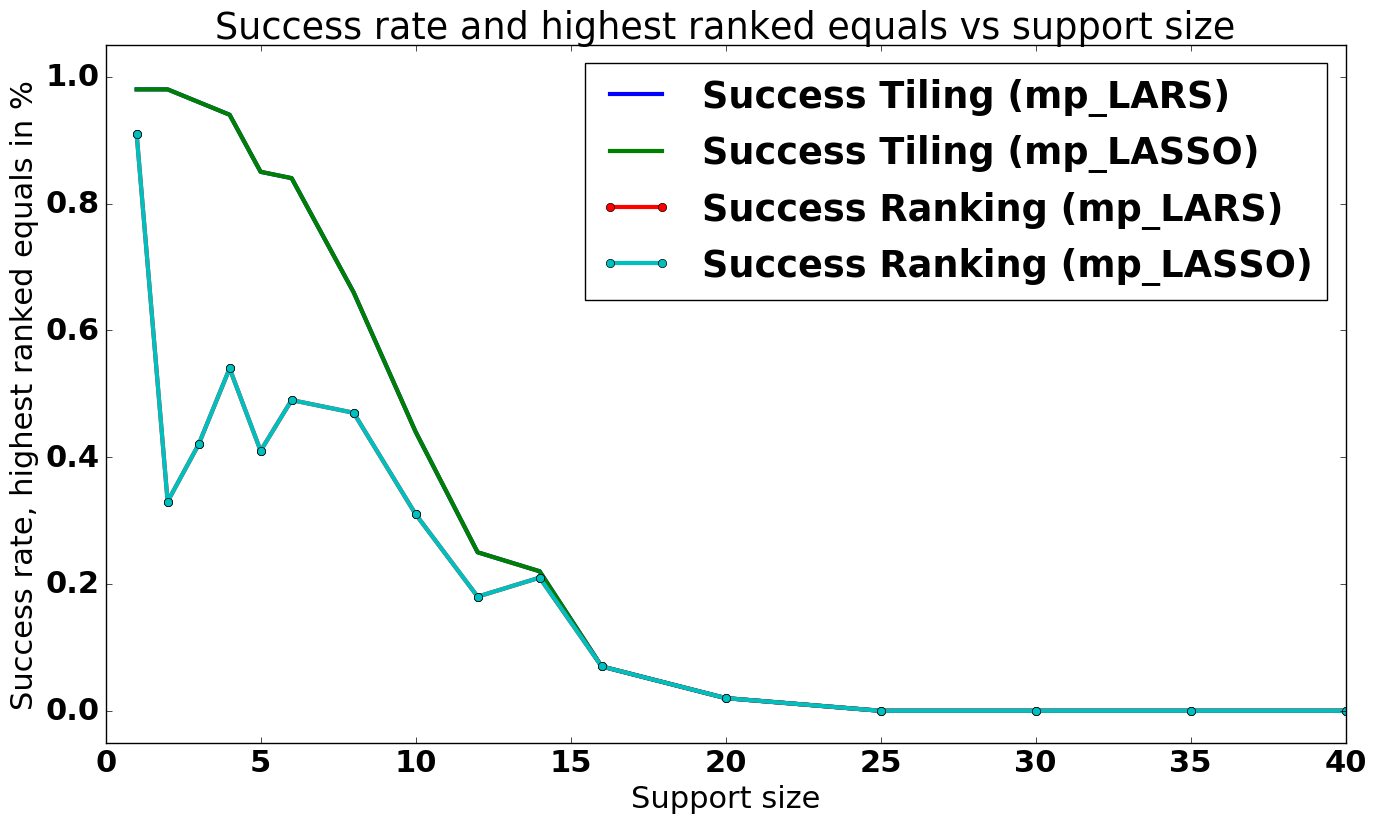

In [3]:
success_plus_highest_ranked_vs_sparsity_level('results_multiple_batches', identifier_mms, 
                        ['mp_LARS', 'mp_LASSO'],  leg_loc = 'upper right')

## 3.2 Case #measurements << #features
Here, we consider experiments where the number of number of measurements is much smaller than the number of features. The sparsity will be varied among the different cases. Additionally, we apply some measurement noise in this experiment.

In [4]:
# Specifying a problem
identifier_mms2 = 'prtm_rm_meas_much_smaller_feat_2' # For saving the files to some folder
random_seeds = [3831044201, 2645702749, 3337245357, 172230183, 1097122368, 2271593326, 1586982492, 77869450, 1858569670, 
        543183466, 768172504, 3494738658, 2588200066, 2356516918, 453436272, 3635834131]
problem_mms2 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 150, # = m 
    'n_features': 500, # = n
    'sparsity_level': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40], # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.15, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prtm_rademacher' # Partial random circulant for Rademacher sequences
}

#### Creating results for multi-penalty framework

In [21]:
%%capture
# LARS-version
# Copy old dict
problem_mms2_mpsr = dict(problem_mms2)
# Update with multi-penalty framework properties
problem_mms2_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_mms2], problem_mms2_mpsr)

# LASSO-version
# Copy old dict
problem_mms2_mpsr = dict(problem_mms2)
# Update with multi-penalty framework properties
problem_mms2_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_mms2], problem_mms2_mpsr)

#### Results

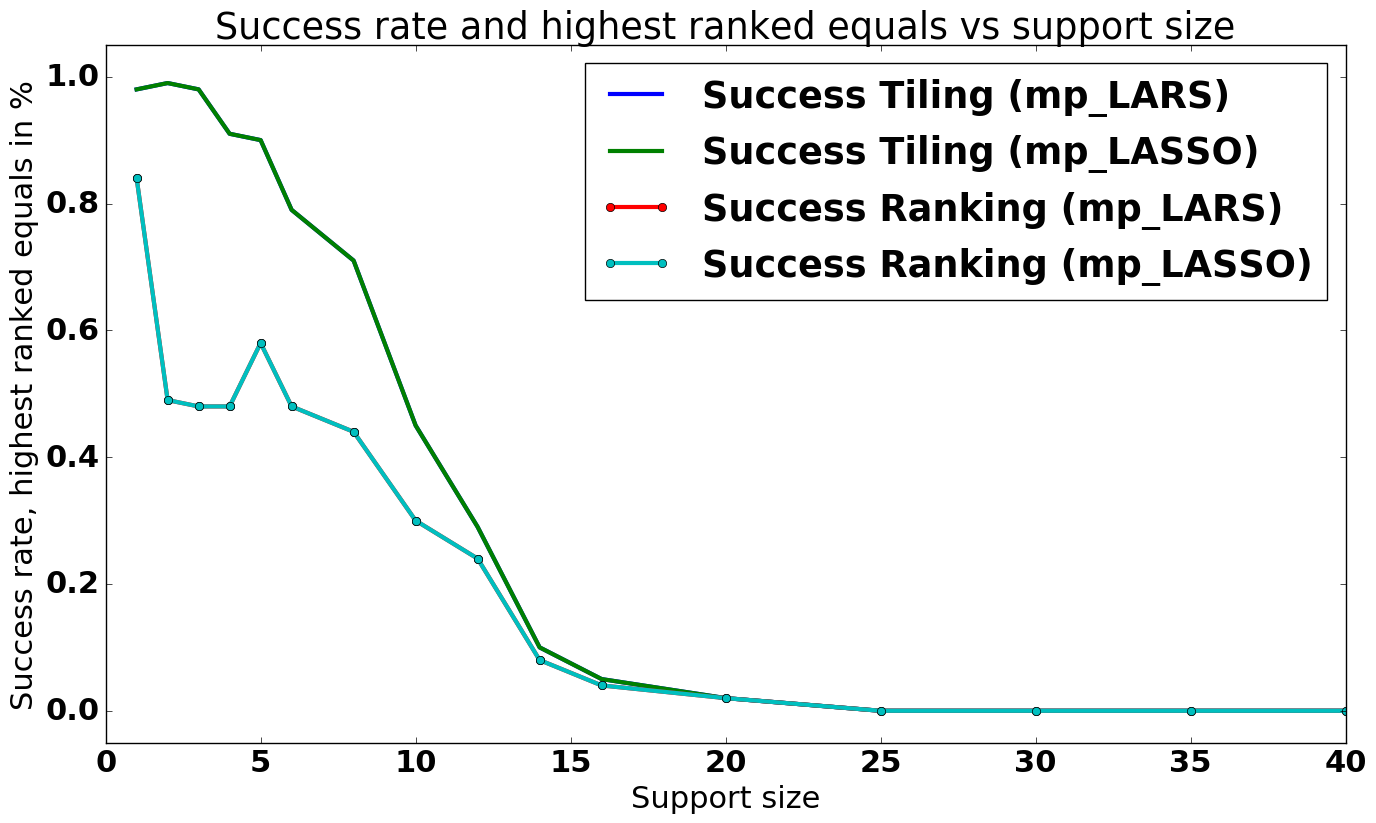

In [5]:
success_plus_highest_ranked_vs_sparsity_level('results_multiple_batches', identifier_mms2, 
                        ['mp_LARS', 'mp_LASSO'], leg_loc = 'upper right')

## 3.3 Case #measurements << #features (high dim)
Here, we consider experiments where the number of measurements is much smaller than the number of features. The sparsity will be varied among the different cases.

In [6]:
# Specifying a problem
identifier_hd = 'prtm_rm_meas_much_smaller_feat_3' # For saving the files to some folder
random_seeds = [1719917373, 3452195488, 725185390, 36078092, 682587451, 990484085, 1235957243, 1560936582, 58906618, 
        1175846739, 3711973846, 3276773036, 2710315242, 2514910014, 4142549271, 1092626253]
problem_hd = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 350, # = m 
    'n_features': 1000, # = n
    'sparsity_level': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40], # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prtm_rademacher' # Partial random circulant for Rademacher sequences
}

#### Creating results for sparse encoders

In [24]:
%%capture
for method in methods:
    main_se(['-t', 'run', '-i', identifier_hd, '-m', method], problem_hd)

#### Creating results for multi-penalty framework

In [25]:
%%capture
# LARS-version
# Copy old dict
problem_hd_mpsr = dict(problem_hd)
# Update with multi-penalty framework properties
problem_hd_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_hd], problem_hd_mpsr)

# LASSO-version
# Copy old dict
problem_hd_mpsr = dict(problem_hd)
# Update with multi-penalty framework properties
problem_hd_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': [1, 2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 20, 25, 30, 35, 40]}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_hd], problem_hd_mpsr)

#### Results

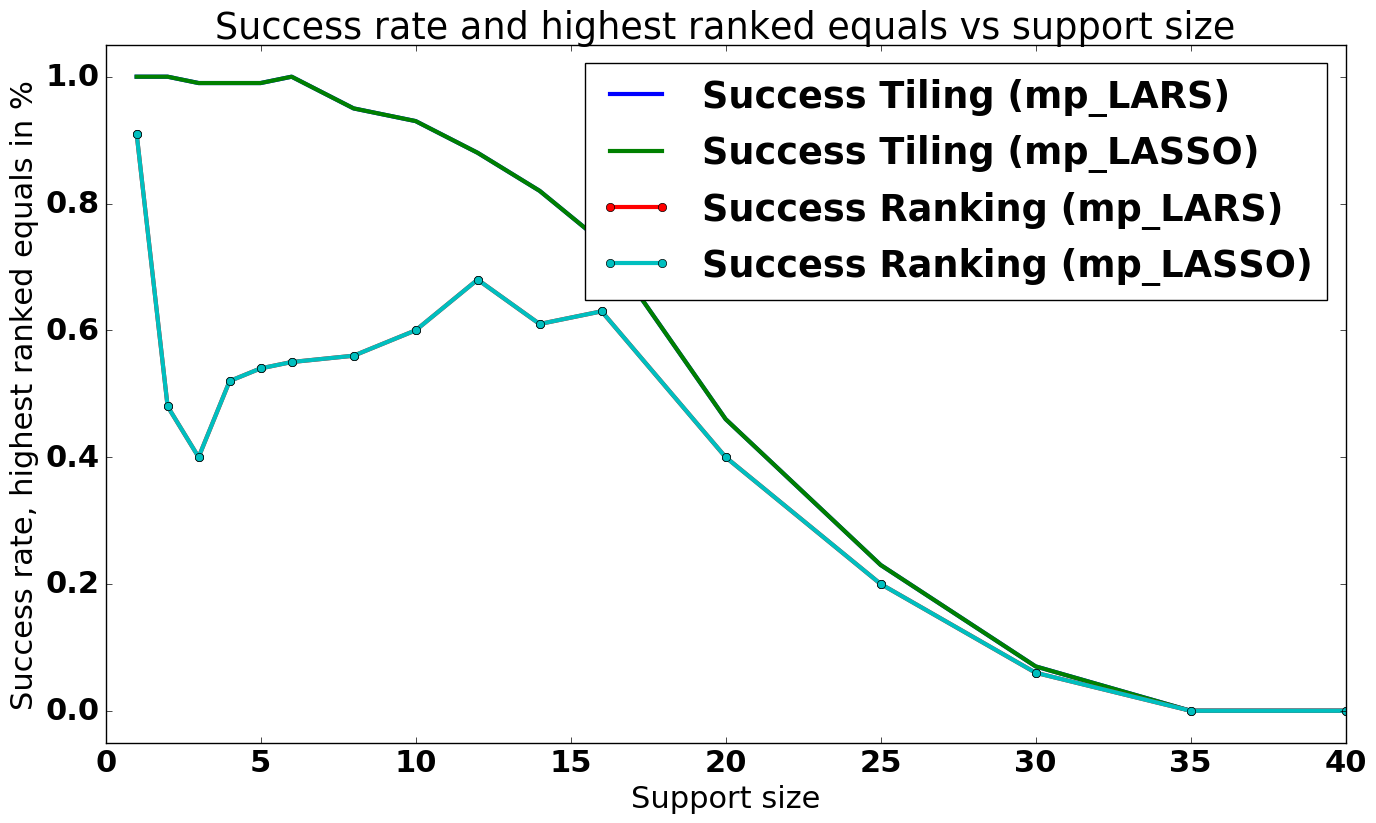

In [7]:
success_plus_highest_ranked_vs_sparsity_level('results_multiple_batches', identifier_hd, 
                                            ['mp_LARS', 'mp_LASSO'], leg_loc = 'upper right')

## 4.1. Case Dependency on signal noise for large $n$, small $m$ and small $s$
Here, we consider experiments in which we examine the dependency on signal noise and the effect of noise-folding. Specifically the matrix is sized $m=100$, $n=500$ and the support size is small with $|I|=5$.

In [9]:
# Specifying a problem
identifier_signal_noise1 = 'prtm_rm_signal_noise1' # For saving the files to some folder
random_seeds = [297118649, 4294351593, 4195643445, 2423172487, 3895608195,
       3305937083, 4027021460, 1695542459, 1569943865, 4292584818,
       3948313521, 3625843773, 3831977843, 1685820579]
problem_signal_noise1 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 100, # = m 
    'n_features': 500, # = n
    'sparsity_level': 5, # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': [0.0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7], # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prtm_rademacher' # Partial random circulant for Rademacher sequences
}

#### Creating results for multi-penalty framework

In [23]:
%%capture
# LARS-version
# Copy old dict
problem_signal_noise1_mpsr = dict(problem_signal_noise1)
# Update with multi-penalty framework properties
problem_signal_noise1_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 5}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise1], problem_signal_noise1_mpsr)

# LASSO-version
# Copy old dict
problem_signal_noise1_mpsr = dict(problem_signal_noise1)
# Update with multi-penalty framework properties
problem_signal_noise1_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 5}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise1], problem_signal_noise1_mpsr)

#### Results

../tiling_graph/mpgraph/mpgraph/plot_tools/multiple_methods_multiple_batches.py:374: RuntimeWarning: divide by zero encountered in divide
  signal_to_noise_ratios = smallest_signal_entry/signal_noise


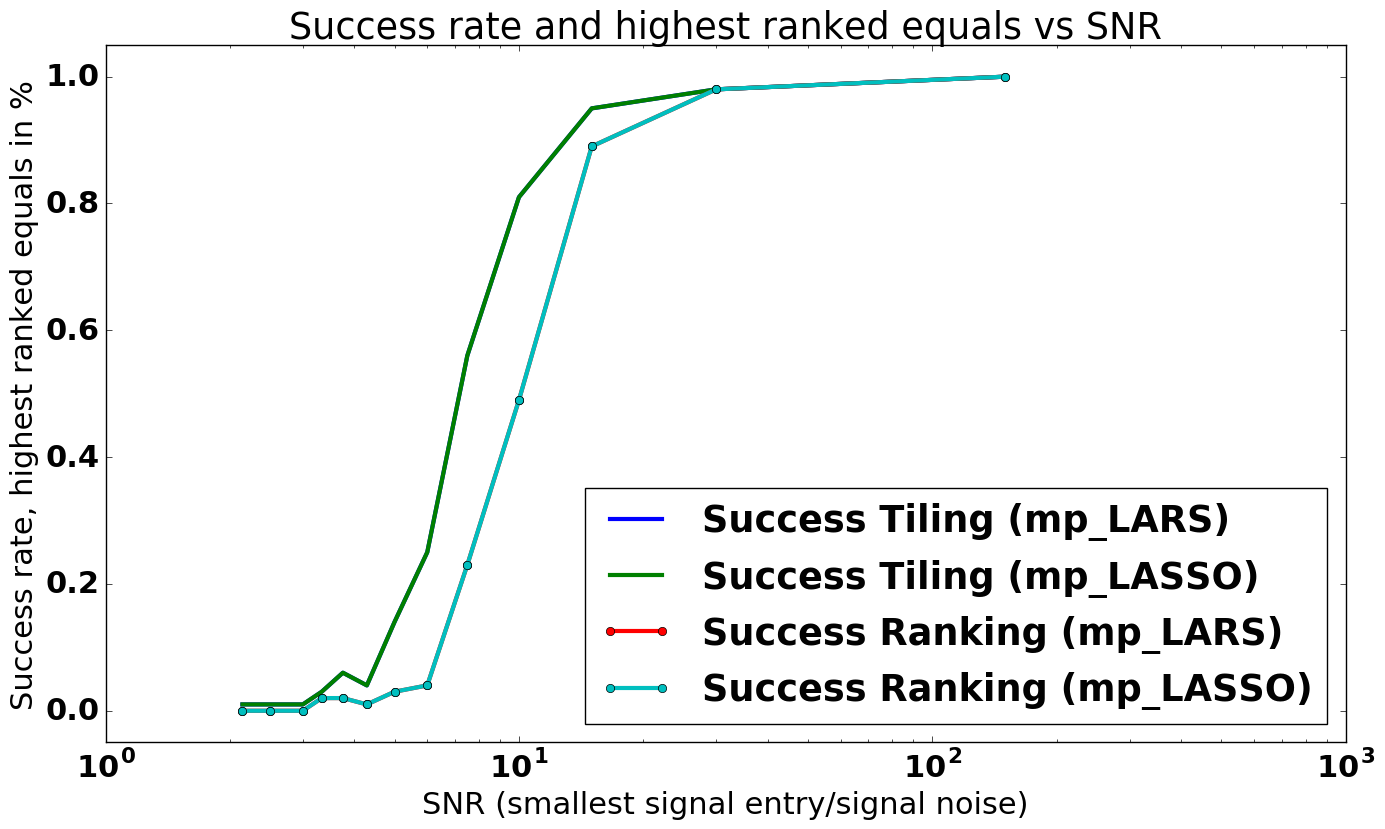

In [10]:
success_plus_highest_ranked_vs_signal_noise('results_multiple_batches', identifier_signal_noise1, 
                        ['mp_LARS', 'mp_LASSO'], leg_loc = 'lower right')

## 4.2. Case Dependency on signal noise for large $n$, moderate $m$ and small $s$
Here, we consider experiments in which we examine the dependency on signal noise and the effect of noise-folding. Specifically the matrix is sized $m=350$, $n=1000$ and the support size is small with $|I|=7$.

In [12]:
# Specifying a problem
identifier_signal_noise2 = 'prtm_rm_signal_noise2' # For saving the files to some folder
random_seeds = [3659563969,  730321311, 3604849067, 2877753012,  517848542,
       2897708796,  849925700,  241602555, 2751521659, 2684449014,
        678407752, 4065536967,  297548970, 1982258906]
problem_signal_noise2 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 350, # = m 
    'n_features': 1000, # = n
    'sparsity_level': 7, # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': [0.0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7], # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prtm_rademacher' # Partial random circulant for Rademacher sequences
}

#### Creating results for multi-penalty framework


In [6]:
%%capture
# LARS-version
# Copy old dict
problem_signal_noise2_mpsr = dict(problem_signal_noise2)
# Update with multi-penalty framework properties
problem_signal_noise2_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 7}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise2], problem_signal_noise2_mpsr)

# LASSO-version
# Copy old dict
problem_signal_noise2_mpsr = dict(problem_signal_noise2)
# Update with multi-penalty framework properties
problem_signal_noise2_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 7}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise2], problem_signal_noise2_mpsr)

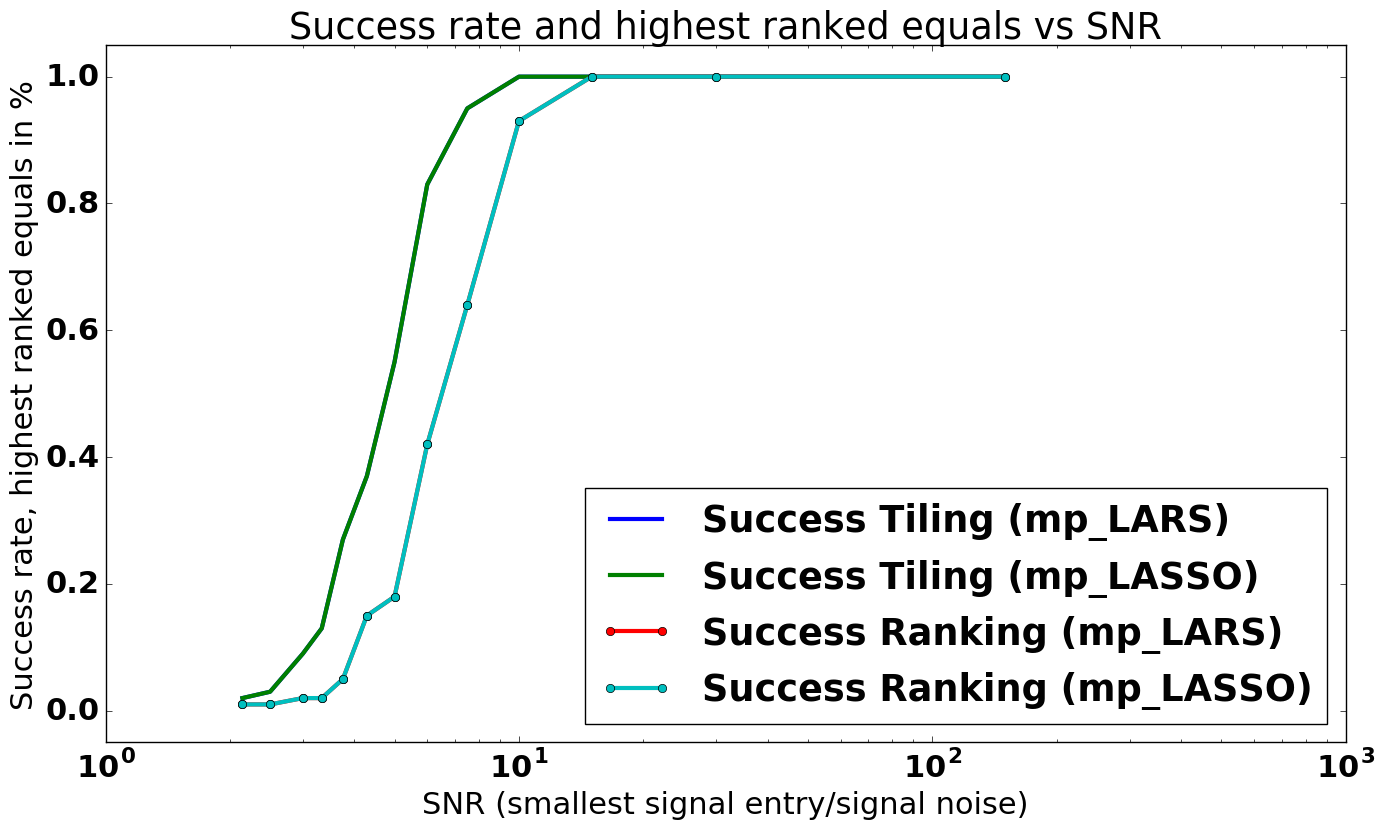

In [13]:
success_plus_highest_ranked_vs_signal_noise('results_multiple_batches', identifier_signal_noise2, 
                        ['mp_LARS', 'mp_LASSO'], leg_loc = 'lower right')

## 4.3. Case Dependency on signal noise for large $n$, moderate $m$ and small $s$
Here, we consider experiments in which we examine the dependency on signal noise and the effect of noise-folding. Specifically the matrix is sized $m=500$, $n=2500$ and the support size is small with $|I|=9$.

In [14]:
# Specifying a problem
identifier_signal_noise3 = 'prtm_rm_signal_noise3' # For saving the files to some folder
random_seeds = [1157130816,  591072719, 2371069839, 3451161389, 2693213011,
       2686279397, 1026199391,  149679061, 3464548919, 1763166223,
       2867857091, 2702705651, 2225654668, 1561747268]
problem_signal_noise3 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 500, # = m 
    'n_features': 2500, # = n
    'sparsity_level': 9, # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': 5.0, # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': [0.0, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7], # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prtm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing',
}

#### Creating results for multi-penalty framework

In [10]:
%%capture
# LARS-version
# Copy old dict
problem_signal_noise3_mpsr = dict(problem_signal_noise3)
# Update with multi-penalty framework properties
problem_signal_noise3_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 9}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise3], problem_signal_noise3_mpsr)

# LASSO-version
# Copy old dict
problem_signal_noise3_mpsr = dict(problem_signal_noise3)
# Update with multi-penalty framework properties
problem_signal_noise3_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 9}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_noise3], problem_signal_noise3_mpsr)

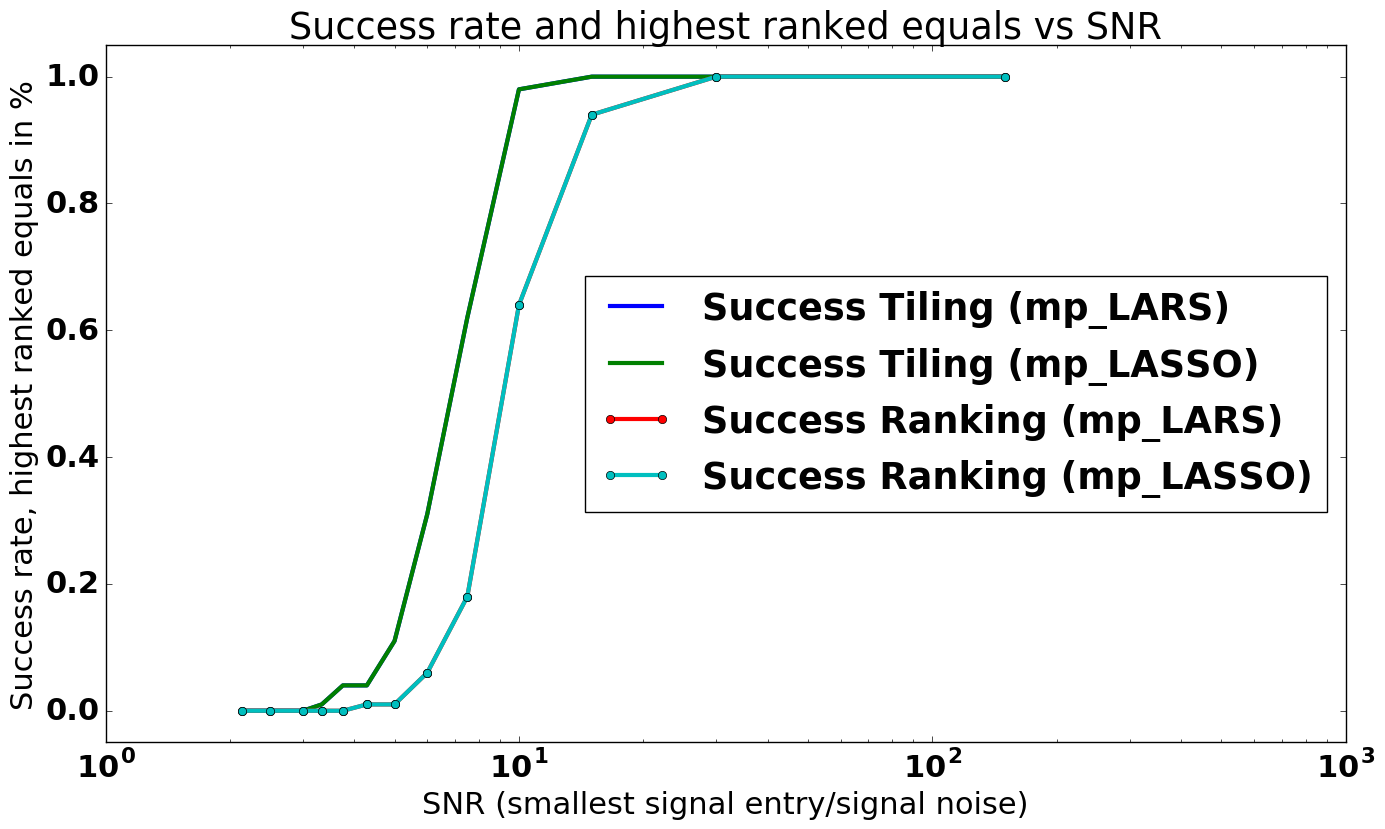

In [15]:
success_plus_highest_ranked_vs_signal_noise('results_multiple_batches', identifier_signal_noise3,
                        ['mp_LARS', 'mp_LASSO'], leg_loc = 'center right')

## 5.1 Case Dependency signal entry gap for $m$, large $n$ and small $s$ 
Here, we consider experiments with $m = 250$, $n = 800$ and $s = |I^\dagger| = 9$ and varying signal gap, ie. we keep the signal noise and the smallest entry at $0.2$ and $1.5$ and vary the largest signal entry.

In [9]:
np.random.randint(1, 4294967295, size=(14))

array([2158724108,  214843250, 1889691788, 1496430572,  882672627,
       2296429403, 3726788996, 2158256635,  860095272,  307896248,
        879133526, 2312463550, 1198194071, 2455085692])

In [16]:
# Specifying a problem
identifier_signal_gap1 = 'prtm_rm_signal_gap1' # For saving the files to some folder
random_seeds = [1155830708, 3179675192, 2105249238, 1188405580, 3358504499,
       2019602890, 3908764081,  444658987, 1394626804,  146562254,
       3396015311, 2176356379,  916434947, 1798182884]
problem_signal_gap1 = {
    'num_tests': 100, # Repititions per fixed experiment
    'n_measurements': 250, # = m 
    'n_features': 800, # = n
    'sparsity_level': 9, # Considered support sizes
    'smallest_signal': 1.5, # Lower bound for signal entries. One entry with smallest signal is ensured!
    'largest_signal': [1.6, 1.8, 2.0, 2.2, 2.5, 3.0, 4.0, 5.0, 7.5, 10.0, 13.5, 17.0, 20.0, 30.0], # Upper bound for signal entries.
    'noise_type_signal': 'uniform_ensured_max', # Uniform sampling of entries of v + maximum will be taken.
    'noise_lev_signal': 0.2, # Bound for absolute of entires of v. 
    'noise_type_measurements': 'gaussian', # Does not matter since we have no measurement noise
    'noise_lev_measurements': 0.0, # No measurement noise
    'random_seed': list(random_seeds),
    'verbosity' : False,
    'sampling_matrix_type' : 'prcm_rademacher', # Partial random circulant for Rademacher sequences
    'problem_type' : 'unmixing',
}

#### Creating results for multi-penalty framework

In [15]:
%%capture
# LARS-version
# Copy old dict
problem_signal_gap1_mpsr = dict(problem_signal_gap1)
# Update with multi-penalty framework properties
problem_signal_gap1_mpsr.update({'tiling_options': tiling_options_LARS, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 9}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_gap1], problem_signal_gap1_mpsr)

# LASSO-version
# Copy old dict
problem_signal_gap1_mpsr = dict(problem_signal_gap1)
# Update with multi-penalty framework properties
problem_signal_gap1_mpsr.update({'tiling_options': tiling_options_LASSO, # Options
                'beta_min': 1e-6, # Lower beta bound
                'beta_max': 100.0, # Upper beta bound
                'upper_bound_tilingcreation': 9}) # Sparsity oracle
main_mp(['-t', 'run', '-i', identifier_signal_gap1], problem_signal_gap1_mpsr)

#### Results

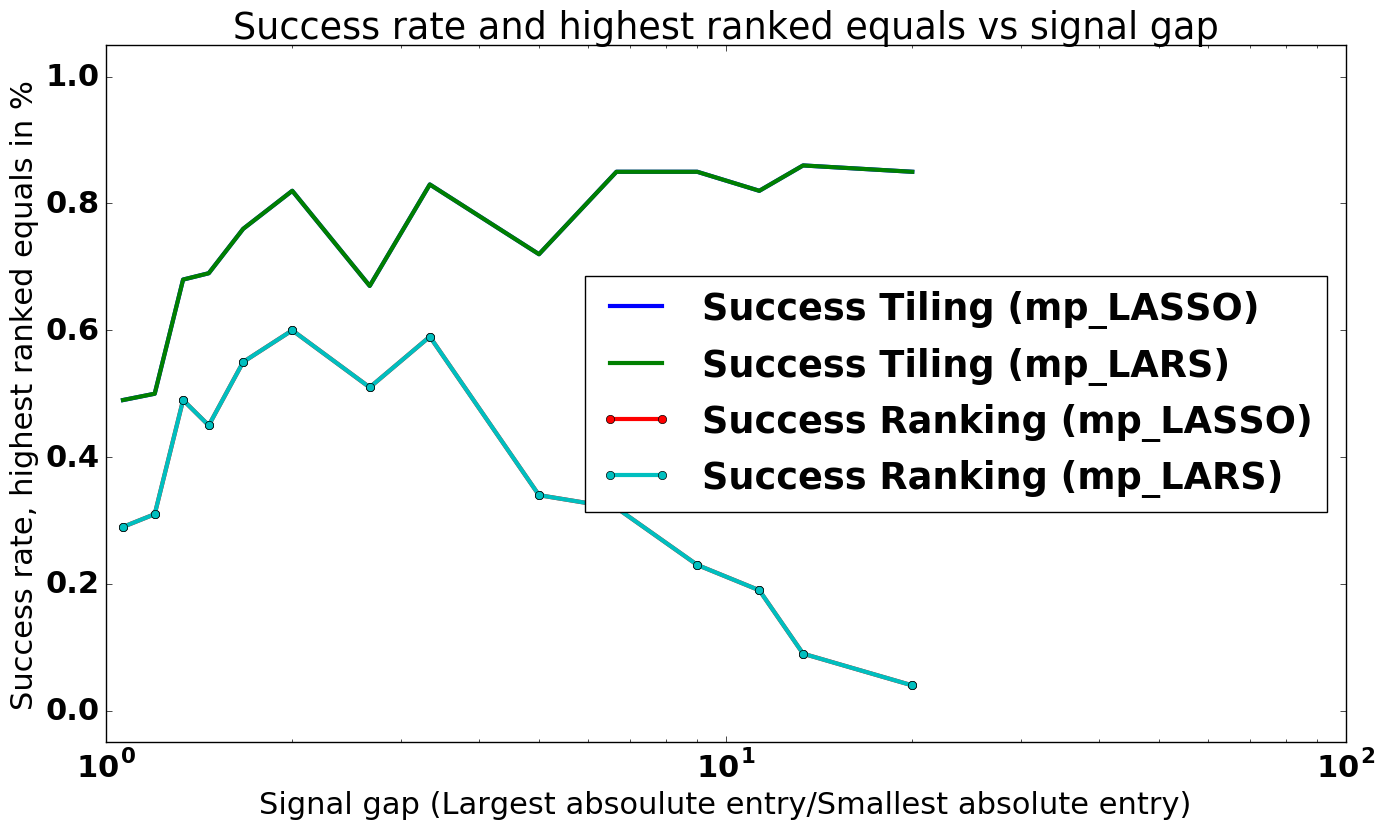

In [19]:
success_plus_highest_ranked_vs_signal_gap('results_multiple_batches', identifier_signal_gap1,  
                                          ['mp_LASSO', 'mp_LARS'], leg_loc = 'center right')

### Sources
1. Efron, Bradley, et al. "Least angle regression." The Annals of statistics 32.2 (2004): 407-499.
2. Blumensath, Thomas, and Mike E. Davies. "Iterative hard thresholding for compressed sensing." Applied and computational harmonic analysis 27.3 (2009): 265-274.
3. Jia, Jinzhu, and Karl Rohe. "Preconditioning to comply with the irrepresentable condition." arXiv preprint arXiv:1208.5584 (2012).
4. Tropp, Joel A., and Anna C. Gilbert. "Signal recovery from random measurements via orthogonal matching pursuit." IEEE Transactions on information theory 53.12 (2007): 4655-4666.